In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [33]:
def jacobi(grid, delta):
    old_grid = np.zeros_like(grid)
    coefficient = 1/4
    i = 0
    while np.max(np.abs(old_grid-grid)) > delta:
        old_grid = grid.copy()
        new_grid = grid.copy()
        for i in range(1, len((grid)) - 1):
            for j in range(1, len(grid[i,:]) -1):
                new_grid[i, j] = grid[i,j] + coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1] - 4 * grid[i,j])
            boundary = grid[i, 0] + coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2] - 4 * grid[i,0])
            new_grid[i,0] = boundary
            new_grid[i,-1] = boundary
        grid = new_grid
        i+=1

    return grid, i

In [43]:
def gauss_seidel(grid, delta):
    old_grid = np.zeros_like(grid)
    coefficient = 1/4
    i = 0
    while np.max(np.abs(old_grid-grid)) > delta:
        old_grid = grid.copy()
        for j in range(1, len((grid[0,:])) - 1):
            for i in range(1, len(grid[:,j]) -1):
                grid[i, j] = grid[i,j] + coefficient * (grid[i+1,j] + grid[i-1,j] + grid[i,j + 1] + grid[i, j -1] - 4 * grid[i,j])
                boundary = grid[i, 0] + coefficient * (grid[i+1,0] + grid[i-1,0] + grid[i,1] + grid[i,-2] - 4 * grid[i,0])
                grid[i,0] = boundary
                grid[i,-1] = boundary
        i+=1

    return grid, i

49


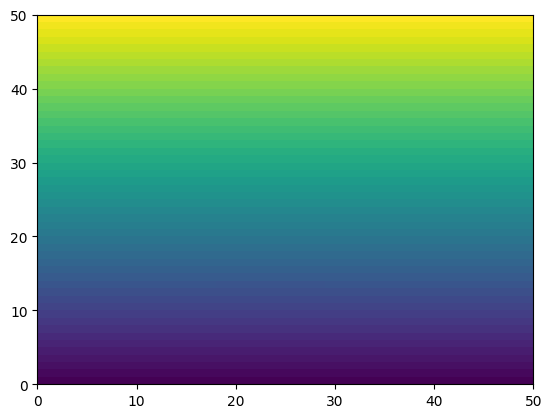

In [44]:
N = 50
initial_grid = np.zeros((N,N))
initial_grid[-1:] += 1
final, k = gauss_seidel(initial_grid, 1e-4)
print(k)
plt.pcolormesh(final)